In [2]:
setwd("/sharedFolder")

In [16]:
require(DESeq2)
require(ggplot2)

In [19]:
name_new_dir_results <- paste(getwd(), "/Results", sep = "")
if (!dir.exists(name_new_dir_results)) {
    dir.create(name_new_dir_results)
}

name_new_dir_partial <- paste(getwd(), "/Partial", sep = "")
if (!dir.exists(name_new_dir_partial)) {
    dir.create(name_new_dir_partial)
}

In [20]:
# Import the data
# row.names=1 specifies that the first column refers to the name of the genes
just.raw.counts = read.delim("Data/Raw_counts_input.txt", row.names=1)  
head(just.raw.counts)
dim(just.raw.counts)

# Import metadata
meta.data <- read.delim("Data/meta_data.txt", row.names=1) 

,E14.5_R1,E14.5_R2,Neonatal_R1,Neonatal_R2,Adult_R1,Adult_R2,TAC_R1,TAC_R2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Xkr4,229,363,545,417,133,96,280,219
Gm1992,0,3,0,0,0,0,1,0
Rp1,3,5,4,26,48,73,7,10
Sox17,206,195,285,226,51,44,53,57
AC129937.1,0,3,0,2,0,0,0,0
Mrpl15,597,599,468,480,318,316,389,347


[1] 27195     8

In [21]:
count.data.set <- DESeqDataSetFromMatrix(countData=just.raw.counts, 
                                         colData=meta.data, design= ~ condition) 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [22]:
# Create DEseq object
count.data.set.object <- DESeq(count.data.set)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [23]:
# Normalize with Variance Stabilizing Transformation
# rlog() could also be used
vsd <- vst(count.data.set.object)

norm.data = assay(vsd)
head(norm.data)

,E14.5_R1,E14.5_R2,Neonatal_R1,Neonatal_R2,Adult_R1,Adult_R2,TAC_R1,TAC_R2
Xkr4,7.677109,8.137802,8.915350,8.566363,7.849458,7.509247,8.505594,8.236562
Gm1992,4.330501,4.784299,4.330501,4.330501,4.330501,4.330501,4.675836,4.330501
Rp1,4.803272,4.914769,4.906902,5.752897,6.724628,7.200788,5.231634,5.418549
Sox17,7.552842,7.394836,8.080148,7.798572,6.784615,6.677513,6.606959,6.710847
AC129937.1,4.330501,4.784299,4.330501,4.739802,4.330501,4.330501,4.330501,4.330501
Mrpl15,8.886284,8.781576,8.714413,8.750078,8.962472,9.005624,8.936597,8.831688


In [24]:
# Create a file with a table of the normalized data
write.table(norm.data, 
            sep = "\t", 
            file = paste0(name_new_dir_partial, 
                          "/Norm_data_all_genes_NO_counts_cut_off.tsv"), 
            row.names = TRUE, 
            col.names = NA, 
            quote = FALSE)

In [25]:
# HIERARCHICAL CLUSTERING

# Calculate euclidean distances
# "t" is transponse: it reverses row and colums in the table
sampleDists <- dist(t(norm.data),  method = "euclidean")

In [26]:
reversed_rows_columns = (t(norm.data))

[1] "clusters"


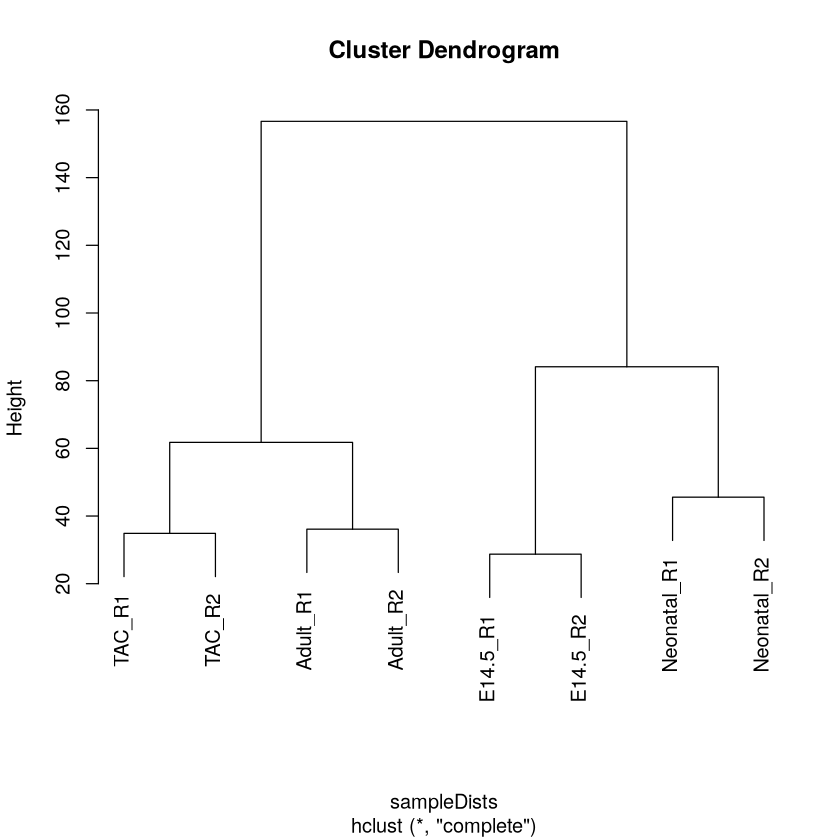

In [27]:
clusters=hclust(sampleDists)
plot(clusters)
print("clusters")

using ntop=500 top features by variance



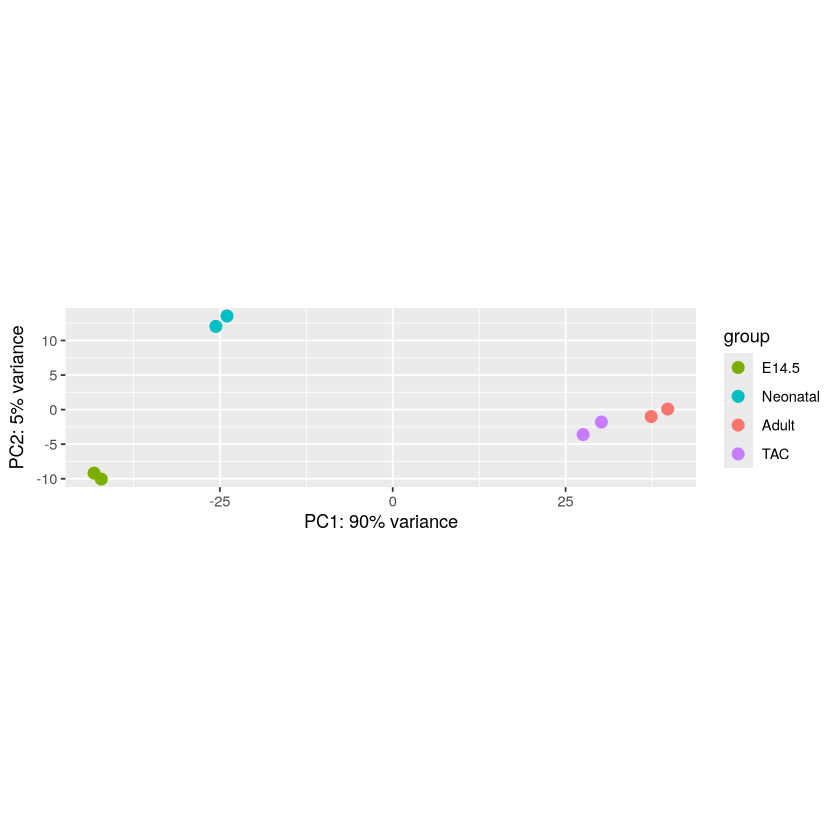

In [29]:
# PCA
# We have to specify that the column "condition" from the metadata has to be taken as a information for replicates grouping
# plotPCA(vsd, intgroup=c("condition")) 

# PCA plot but with the groups organized by increasing developmental stage
plotPCA(vsd, intgroup=c("condition")) +
  scale_colour_hue(breaks = c("E14.5","E14.5","Neonatal","Neonatal","Adult","Adult","TAC","TAC"))

In [30]:
print("pca")

[1] "pca"
